<a href="https://colab.research.google.com/github/wanasyraf4/StructureAndIntepretationInProgramming/blob/main/Chapter_1_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.3 Defining New Functions


---


We have identified in Python some of the elements that must appear in any powerful programming language:

1. Numbers and arithmetic operations are built-in data and functions.
2. Nested function application provides a means of combining operations.
3. Binding names to values provides a limited means of abstraction.

Now we will learn about *function definitions*, a much more powerful abstraction technique by which a name can be bound to compound operation, which can then be referred to as a unit.

We begin by examining how to express the idea of "squaring." We might say, "To square something, multiply it by itself." This is expressed in Python as

In [17]:
from operator import add, sub, mul

In [18]:
def square(x):
  return mul(x,x)

which defines a new function that has been given the name `square`. This user-defined function is not built into the interpreter. It represents the compound operation of multiplying something by itself. The `x` in this definition is called a *formal parameter*, which provides a name for the thing to be multiplied. The definition creates this user-defined function and associates it with the name `square`.

Function definitions consist of a def statement that indicates a `<name>` and a list of named `<formal parameters>`, then a `return` statement, called the function body, that specifies the `<return expression> `of the function, which is an expression to be evaluated whenever the function is applied.

>`def <name>(<formal parameters>):`
>
>`return <return expression>`

The second line *must* be indented! Convention dictates that we indent with four spaces, rather than a tab. The return expression is not evaluated right away; it is stored as part of the newly defined function and evaluated only when the function is eventually applied. (Soon, we will see that the indented region can span multiple lines.)

Having defined `square`, we can apply it with a call expression:

In [19]:
square(2)

4

In [20]:
square(add(2,5))

49

In [21]:
square(square(3))

81

User-defined functions are used in exactly the same way as built-in functions. Indeed, one cannot tell from the definition of `sum_squares` whether `square` is built into the interpreter, imported from a module, or defined by the user.

**1.3.1 Environments**


---


Our subset of Python is now complex enough that the meaning of programs is non-obvious. What if a formal parameter has the same name as a built-in function? Can two functions share names without confusion? To resolve such questions, we must describe environments in more detail.

An environment in which an expression is evaluated consists of a sequence of *frames*, depicted as boxes. Each frame contains bindings, which associate a name with its corresponding value. There is a single *global* frame that contains name bindings for all built-in functions (only `abs` and `max` are shown). We indicate the global frame with a globe symbol.



Assignment and import statements add entries to the first frame of the current environment. So far, our environment consists only of the global frame.

In [5]:
from math import pi
tau = 2*pi
tau

6.283185307179586

A `def` statement also binds a name to the function created by the definition. The resulting environment after defining `square` appears below:

In [4]:
def tau():
  return 2*pi

tau()

6.283185307179586

These *environment* diagrams show the bindings of the current environment, along with the values (which are not part of any frame) to which names are bound. Notice that the name of a function is repeated, once in the frame, and once as part of the function itself. This repetition is intentional: many different names may refer to the same function, but that function itself has only one intrinsic name. However, looking up the value for a name in an environment only inspects name bindings. The intrinsic name of a function **does not** play a role in looking up names. In the example we saw earlier,

In [22]:
f = max
f

<function max>

The name *max* is the intrinsic name of the function, and that's what you see printed as the value for `f`. In addition, both the names `max` and `f` are bound to that same function in the global environment.

As we proceed to introduce additional features of Python, we will have to extend these diagrams. Every time we do, we will list the new features that our diagrams can express.

**New environment Features:** Assignment and user-defined function definition.

**1.3.2 Calling User-Defined Functions**


---


To evaluate a call expression whose operator names a user-defined function, the Python interpreter follows a process similar to the one for evaluating expressions with a built-in operator function. That is, the interpreter evaluates the operand expressions, and then applies the named function to the resulting arguments.

The act of applying a user-defined function introduces a second *local frame*, which is only accessible to that function. To apply a user-defined function to some arguments:

1. Bind the arguments to the names of the function's formal parameters in a new local frame.
2. Evaluate the body of the function in the environment beginning at that frame and ending at the global frame.

The environment in which the body is evaluated consists of two frames: first the local frame that contains argument bindings, then the global frame that contains everything else. Each instance of a function application has its own independent local frame.

This figure includes two different aspects of the Python interpreter: the current environment, and a part of the expression tree related to the current line of code being evaluated. We have depicted the evaluation of a call expression that has a user-defined function (in blue) as a two-part rounded rectangle. Dotted arrows indicate which environment is used to evaluate the expression in each part.

* The top half shows the call expression being evaluated. This call expression is not internal to any function, so it is evaluated in the global environment. Thus, any names within it (such as `square`) are looked up in the global frame.
* The bottom half shows the body of the `square` function. Its return expression is evaluated in the new environment introduced by step 1 above, which binds the name of `square`'s formal parameter `x` to the value of its argument, `-2`.

The order of frames in an environment affects the value returned by looking up a name in an expression. We stated previously that a name is evaluated to the value associated with that name in the current environment. We can now be more precise:

* A name evaluates to the value bound to that name in the earliest frame of the current environment in which that name is found.

Our conceptual framework of environments, names, and functions constitutes a *model of evaluation*; while some mechanical details are still unspecified (e.g., how a binding is implemented), our model does precisely and correctly describe how the interpreter evaluates call expressions. In Chapter 3 we shall see how this model can serve as a blueprint for implementing a working interpreter for a programming language.

**New environment Feature:** Function application.

**1.3.3 Example: Calling a User-Defined Function**


---


Let us again consider our two simple definitions:

In [23]:
from operator import add, mul

In [24]:
def square(x):
        return mul(x, x)

In [25]:
def sum_squares(x, y):
        return add(square(x), square(y))

And the process that evaluates the following call expression:

In [26]:
sum_squares(5, 12)

169

Python first evaluates the name `sum_squares`, which is bound to a user-defined function in the global frame. The primitive numeric expressions 5 and 12 evaluate to the numbers they represent.

Next, Python applies `sum_squares`, which introduces a local frame that binds x to 5 and y to 12.

In this diagram, the local frame points to its successor, the global frame. All local frames must point to a predecessor, and these links define the sequence of frames that is the current environment.

The body of `sum_squares` contains this call expression:

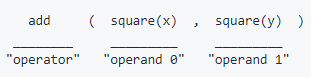

All three subexpressions are evalauted in the current environment, which begins with the frame labeled *sum_squares*. The operator subexpression `add` is a name found in the global frame, bound to the built-in function for addition. The two operand subexpressions must be evaluated in turn, before addition is applied. Both operands are evaluated in the current environment beginning with the frame labeled `sum_squares`. In the following environment diagrams, we will call this frame A and replace arrows pointing to this frame with the label A as well.

In `operand` 0, `square` names a user-defined function in the global frame, while `x` names the number `5` in the local frame. Python applies `square` to 5 by introducing yet another local frame that binds `x` to `5`.

Using this local frame, the body expression `mul(x, x)` evaluates to `25`.

Our evaluation procedure now turns to `operand 1`, for which y names the number 12. Python evaluates the body of `square` again, this time introducing yet another local environment frame that binds `x` to 12. Hence, `operand` 1 evaluates to 144.

Finally, applying addition to the arguments 25 and 144 yields a final value for the body of `sum_squares`: 169.

This figure, while complex, serves to illustrate many of the fundamental ideas we have developed so far. Names are bound to values, which spread across many local frames that all precede a single global frame that contains shared names. Expressions are tree-structured, and the environment must be augmented each time a subexpression contains a call to a user-defined function.

All of this machinery exists to ensure that names resolve to the correct values at the correct points in the expression tree. This example illustrates why our model requires the complexity that we have introduced. All three local frames contain a binding for the name `x`, but that name is bound to different values in different frames. Local frames keep these names separate.

**1.3.4 Local Names**


---


One detail of a function's implementation that should not affect the function's behavior is the implementer's choice of names for the function's formal parameters. Thus, the following functions should provide the same behavior:

In [27]:
def square(x):
        return mul(x, x)

In [28]:
def square(y):
        return mul(y, y)

This principle -- that the meaning of a function should be independent of the parameter names chosen by its author -- has important consequences for programming languages. The simplest consequence is that the parameter names of a function must remain local to the body of the function.

If the parameters were not local to the bodies of their respective functions, then the parameter `x` in `square` could be confused with the parameter `x` in `sum_squares`. Critically, this is not the case: the binding for `x` in different local frames are unrelated. Our model of computation is carefully designed to ensure this independence.

We say that the scope of a local name is limited to the body of the user-defined function that defines it. When a name is no longer accessible, it is out of scope. This scoping behavior isn't a new fact about our model; it is a consequence of the way environments work.

**1.3.5 Practical Guidance: Choosing Names**


---


The interchangeabily of names does not imply that formal parameter names do not matter at all. To the contrary, well-chosen function and parameter names are essential for the human interpretability of function definitions!

The following guidelines are adapted from the style guide for Python code, which serves as a guide for all (non-rebellious) Python programmers. A shared set of conventions smooths communication among members of a programming community. As a side effect of following these conventions, you will find that your code becomes more internally consistent.

1. Function names should be lowercase, with words separated by underscores. Descriptive names are encouraged.
2. Function names typically evoke operations applied to arguments by the interpreter (e.g., print, add, square) or the name of the quantity that results (e.g., max, abs, sum).
3. Parameter names should be lowercase, with words separated by underscores. Single-word names are preferred.
4. Parameter names should evoke the role of the parameter in the function, not just the type of value that is allowed.
5. Single letter parameter names are acceptable when their role is obvious, but never use "l" (lowercase ell), "O" (capital oh), or "I" (capital i) to avoid confusion with numerals.

Review these guidelines periodically as you write programs, and soon your names will be delightfully Pythonic.

**1.3.6 Functions as Abstractions**


---


Though it is very simple, `sum_squares` exemplifies the most powerful property of user-defined functions. The function `sum_squares` is defined in terms of the function `square`, but relies only on the relationship that `square` defines between its input arguments and its output values.

We can write `sum_squares` without concerning ourselves with how to square a number. The details of how the square is computed can be suppressed, to be considered at a later time. Indeed, as far as `sum_squares` is concerned, `square` is not a particular function body, but rather an abstraction of a function, a so-called functional abstraction. At this level of abstraction, any function that computes the square is equally good.

Thus, considering only the values they return, the following two functions for squaring a number should be indistinguishable. Each takes a numerical argument and produces the square of that number as the value.

In [29]:
def square(x):
        return mul(x, x)

In [30]:
square(2)

4

In [36]:
def square(x):
        return mul(x, x-1) + x

In [37]:
square(3)

9

In other words, a function definition should be able to suppress details. The users of the function may not have written the function themselves, but may have obtained it from another programmer as a "black box". A user should not need to know how the function is implemented in order to use it. The Python Library has this property. Many developers use the functions defined there, but few ever inspect their implementation. In fact, many implementations of Python Library functions are not written in Python at all, but instead in the C language.

**1.3.7 Operators**

---


Mathematical operators (like `+` and `-`) provided our first example of a method of combination, but we have yet to define an evaluation procedure for expressions that contain these operators.

Python expressions with infix operators each have their own evaluation procedures, but you can often think of them as short-hand for call expressions. When you see

In [38]:
2 + 3

5

simply consider it to be short-hand for

In [39]:
add(2,3)

5

Infix notation can be nested, just like call expressions. Python applies the normal mathematical rules of operator precedence, which dictate how to interpret a compound expression with multiple operators.

In [40]:
2 + 3 * 4 + 5

19

evaluates to the same result as

In [41]:
add(add(2, mul(3, 4)) , 5)

19

The nesting in the call expression is more explicit than the operator version. Python also allows subexpression grouping with parentheses, to override the normal precedence rules or make the nested structure of an expression more explicit.

In [42]:
(2 + 3) * (4 + 5)

45

evaluates to the same result as

In [43]:
mul(add(2, 3), add(4, 5))

45

You should feel free to use these operators and parentheses in your programs. Idiomatic Python prefers operators over call expressions for simple mathematical operations.